In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('data/bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


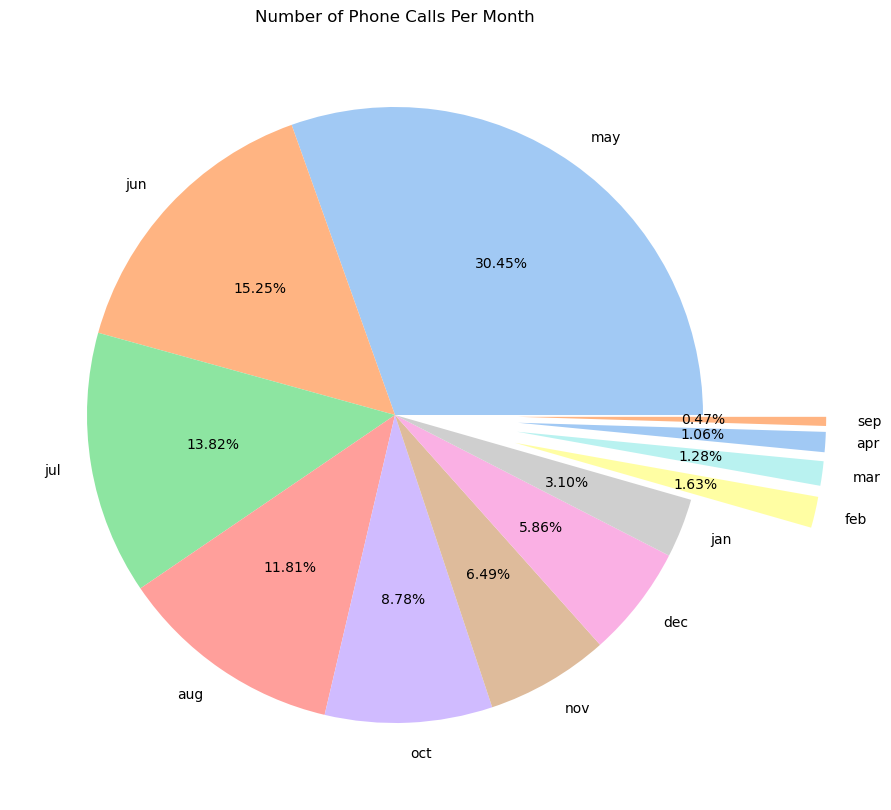

In [41]:
g = data['month'].value_counts()
# Declaring exploding pie
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.4, 0.4, 0.4, 0.4]
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:11]
keys= ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep']
plt.pie(g, labels=keys, colors=colors,explode=explode,autopct='%.2f%%')
# Set the title
plt.title("Number of Phone Calls Per Month")
#Save the plot
plt.savefig('figure_1.png')
#Show the plot
plt.show()

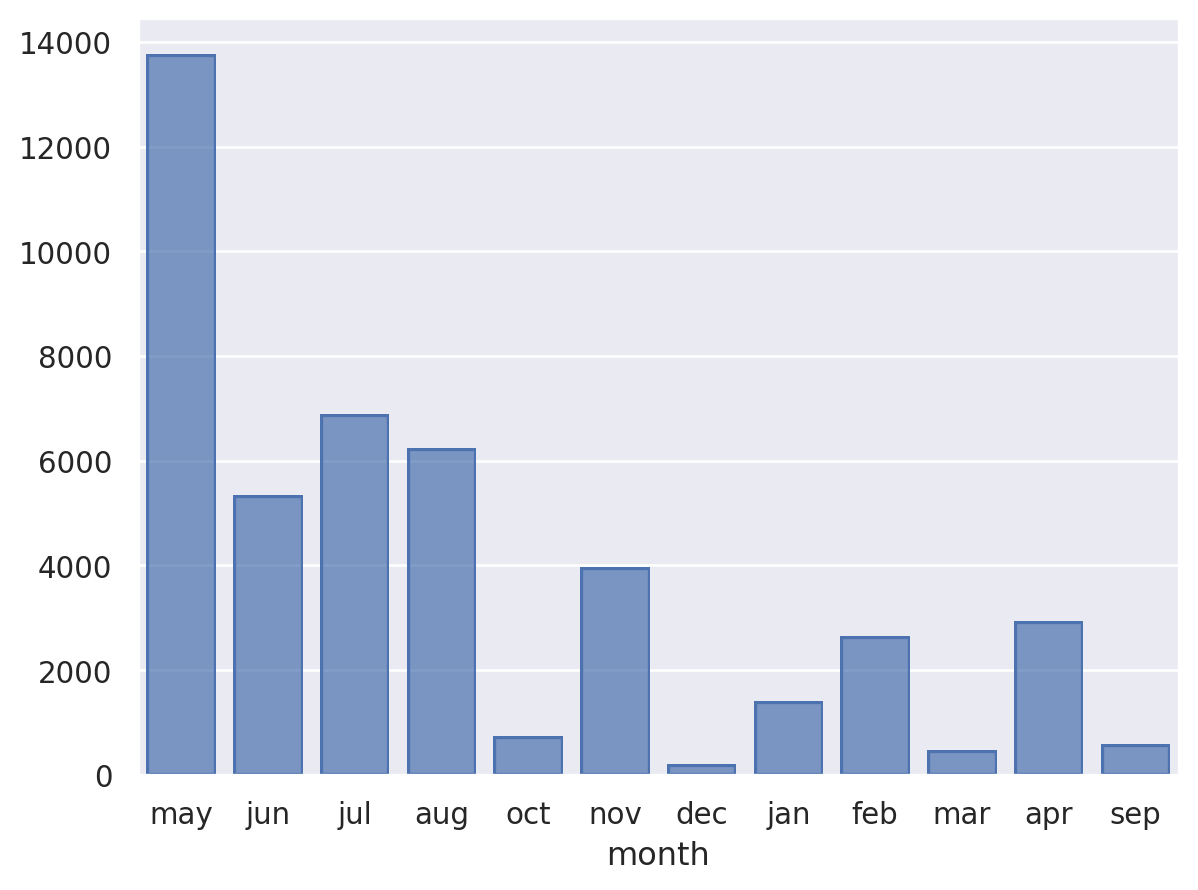

In [5]:
(
    so.Plot(data, x="month")
    .add(so.Bar(), so.Hist())
)

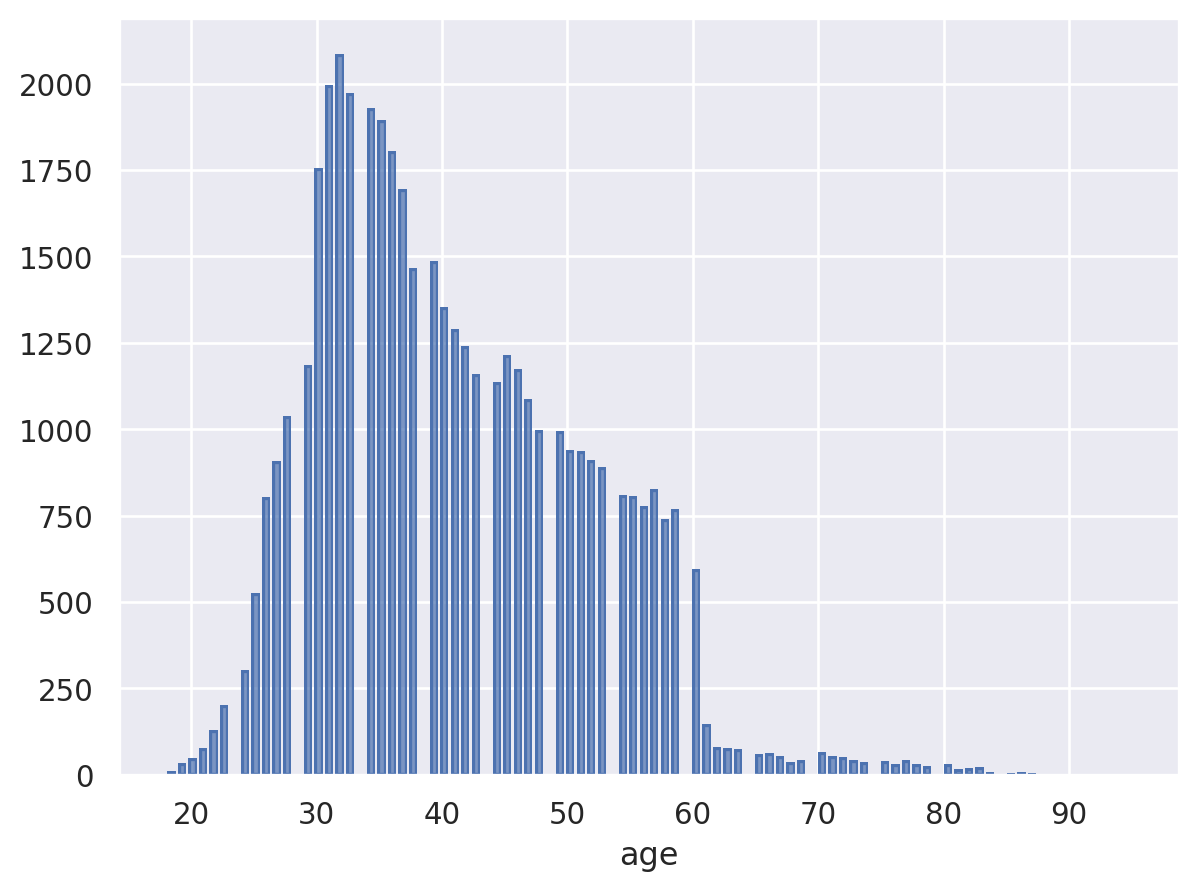

In [6]:
(
    so.Plot(data, x="age")
    .add(so.Bar(), so.Hist())
)

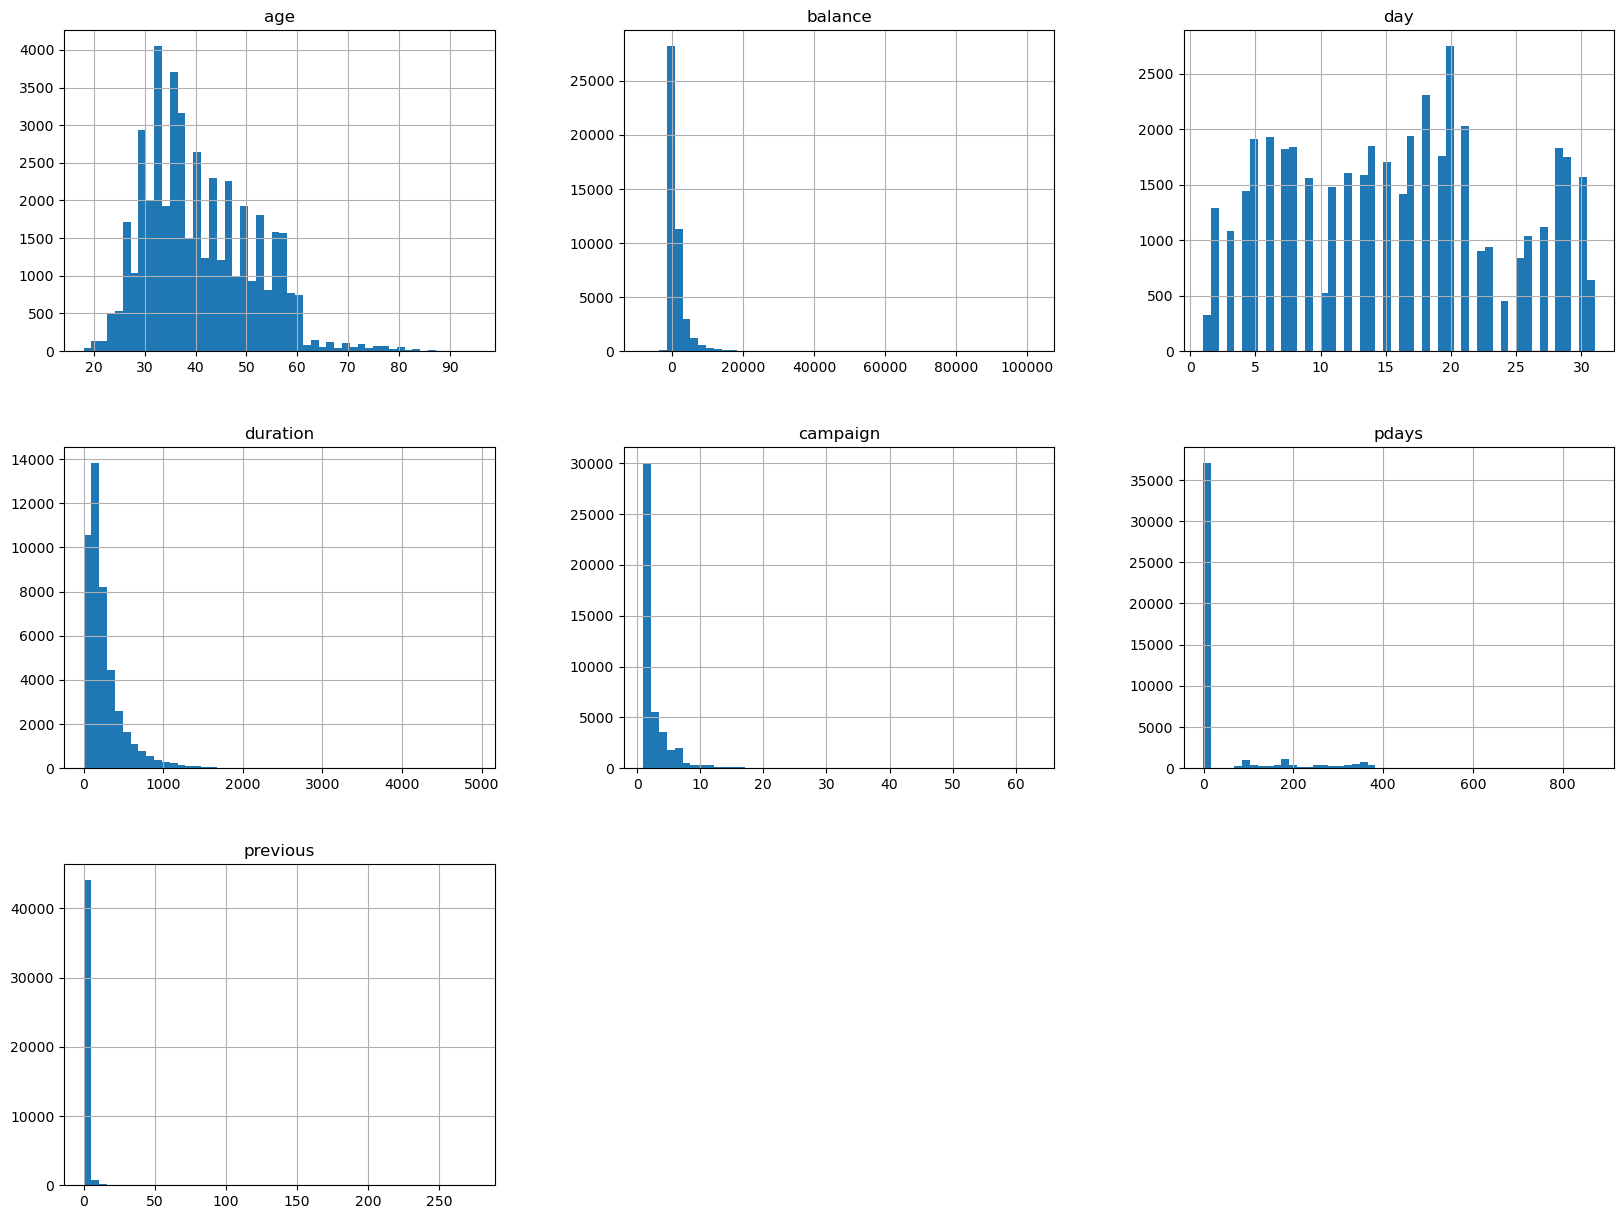

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

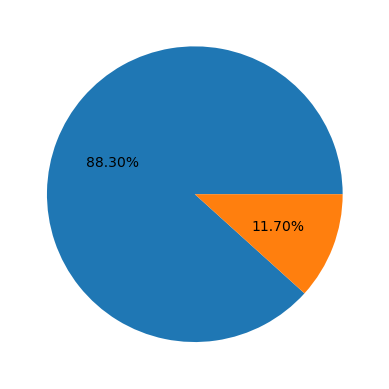

In [8]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data.y.value_counts(), autopct='%.2f%%')
plt.show()

In [9]:
def convert_target_yes_no_to_int(target):
  if target == "yes":
    return 1
  else:
    return 0

In [10]:
data['y'] = data['y'].apply(convert_target_yes_no_to_int)

In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
# make a copy of the original dataset
X = data.copy()

In [38]:
# from pathlib import Path  
# filepath = Path('data/clean_folder/out.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data.to_csv(filepath, index=False)

In [14]:
# divide the dataset into training, validation and test set using sklearn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=11)

In [15]:
print(f'Training Set: ', X_train.shape)
print(f'Test Set: ', X_test.shape)

Training Set:  (36168, 17)
Test Set:  (9043, 17)


In [16]:
y_train = X_train['y']
y_test = X_test['y']

In [17]:
del X_train['y']
del X_test['y']

In [18]:
categorical_types = ['object']  # the categorical types in Pandas
categorical_columns = df.select_dtypes(include=categorical_types).columns.tolist()
# Isolate the numeric features in group for easier processing
numeric_types = ['float64', 'int16', 'int64']  # the numeric types in Pandas
numeric_columns = df.select_dtypes(include=numeric_types).columns.tolist()# data['month'] = data['month'].apply(month_num)

In [19]:
num_attribs = list(numeric_columns)
cat_attribs = list(categorical_columns)

In [20]:
num_attribs

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

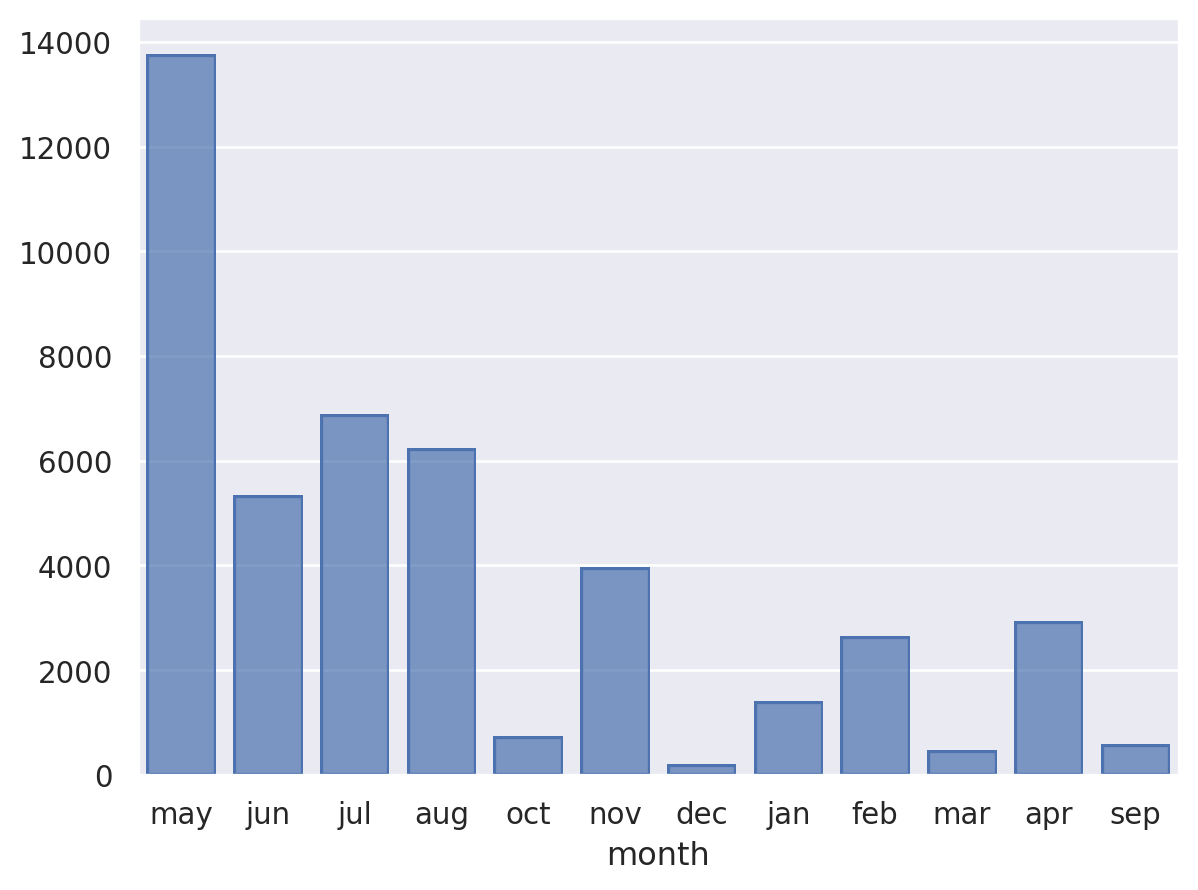

In [21]:
(
    so.Plot(data, x="month")
    .add(so.Bar(), so.Hist())
)

## Isolate the categorical features in group for easier processing

In [22]:

categorical_types = ['object']  # the categorical types in Pandas
categorical_columns = X.select_dtypes(include=categorical_types).columns.tolist()
# Isolate the numeric features in group for easier processing
numeric_types = ['float64', 'int16', 'int64']  # the numeric types in Pandas
numeric_columns = X.select_dtypes(include=numeric_types).columns.tolist()# data['month'] = data['month'].apply(month_num)
#numeric_columns.pop()

In [23]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [24]:
numeric_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [25]:
data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corrwith(data.y)*100

age          2.515502
balance      5.283841
day         -2.834778
duration    39.452102
campaign    -7.317201
pdays       10.362149
previous     9.323577
dtype: float64

In [26]:
global_mean = X.y.mean()

In [27]:
round(global_mean, 3)

0.117

In [28]:
for col in categorical_columns:
    df_group = data.groupby(by=col).y.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    df_group['global_mean'] = global_mean
    display(df_group.T)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
mean,0.122027,0.072750,0.082717,0.087903,0.137556,0.227915,0.118429,0.088830,0.286780,0.110570,0.155027,0.118056
diff,0.005042,-0.044235,-0.034268,-0.029082,0.020571,0.110930,0.001445,-0.028155,0.169796,-0.006415,0.038042,0.001071
rate,1.043099,0.621873,0.707074,0.751407,1.175841,1.948246,1.012348,0.759330,2.451433,0.945165,1.325188,1.009153
global_mean,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985


marital,divorced,married,single
mean,0.119455,0.101235,0.149492
diff,0.002470,-0.015750,0.032507
rate,1.021112,0.865366,1.277874
global_mean,0.116985,0.116985,0.116985


education,primary,secondary,tertiary,unknown
mean,0.086265,0.105594,0.150064,0.135703
diff,-0.030720,-0.011390,0.033079,0.018718
rate,0.737402,0.902633,1.282764,1.160003
global_mean,0.116985,0.116985,0.116985,0.116985


default,no,yes
mean,0.117961,0.063804
diff,0.000976,-0.053181
rate,1.008345,0.545401
global_mean,0.116985,0.116985


housing,no,yes
mean,0.167024,0.077000
diff,0.050039,-0.039985
rate,1.427737,0.658202
global_mean,0.116985,0.116985


loan,no,yes
mean,0.126557,0.066814
diff,0.009572,-0.050171
rate,1.081827,0.571133
global_mean,0.116985,0.116985


contact,cellular,telephone,unknown
mean,0.149189,0.134205,0.040707
diff,0.032204,0.017220,-0.076278
rate,1.275285,1.147201,0.347965
global_mean,0.116985,0.116985,0.116985


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
mean,0.196794,0.110133,0.467290,0.166478,0.101212,0.090935,0.102228,0.519916,0.067195,0.101511,0.437669,0.464594
diff,0.079809,-0.006852,0.350305,0.049493,-0.015773,-0.026049,-0.014757,0.402931,-0.049790,-0.015473,0.320685,0.347609
rate,1.682218,0.941429,3.994448,1.423073,0.865170,0.777327,0.873857,4.444305,0.574387,0.867731,3.741250,3.971406
global_mean,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985,0.116985


poutcome,failure,other,success,unknown
mean,0.126097,0.166848,0.647253,0.091615
diff,0.009112,0.049863,0.530269,-0.025370
rate,1.077890,1.426235,5.532800,0.783136
global_mean,0.116985,0.116985,0.116985,0.116985


In [29]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, data.y)

df_mi = X[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi*100

,MI
poutcome,2.939724
month,2.435117
contact,1.362684
housing,0.965398
job,0.826432
loan,0.263045
education,0.259818
marital,0.210122
default,0.029423


In [30]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [33]:
print(*categorical_columns)

job marital education default housing loan contact month poutcome


In [34]:
print(*numeric_columns)

age balance day duration campaign pdays previous y


In [35]:
X = data[categorical_columns + numeric_columns]
y = data.y

In [36]:
data.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [37]:
y_train.value_counts()

y
0    31930
1     4238
Name: count, dtype: int64

In [ ]:
data.head()